# **Polynomial Logistic Regression**

### **Note: At the last section of this Jupyter Notebook there is an error while plotting a decision graph using `mlxtend` python library.**

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix

In [4]:

df = pd.read_csv(r"https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")

In [7]:

df.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,virginica
26,5.0,3.4,1.6,0.4,setosa
133,6.3,2.8,5.1,1.5,virginica


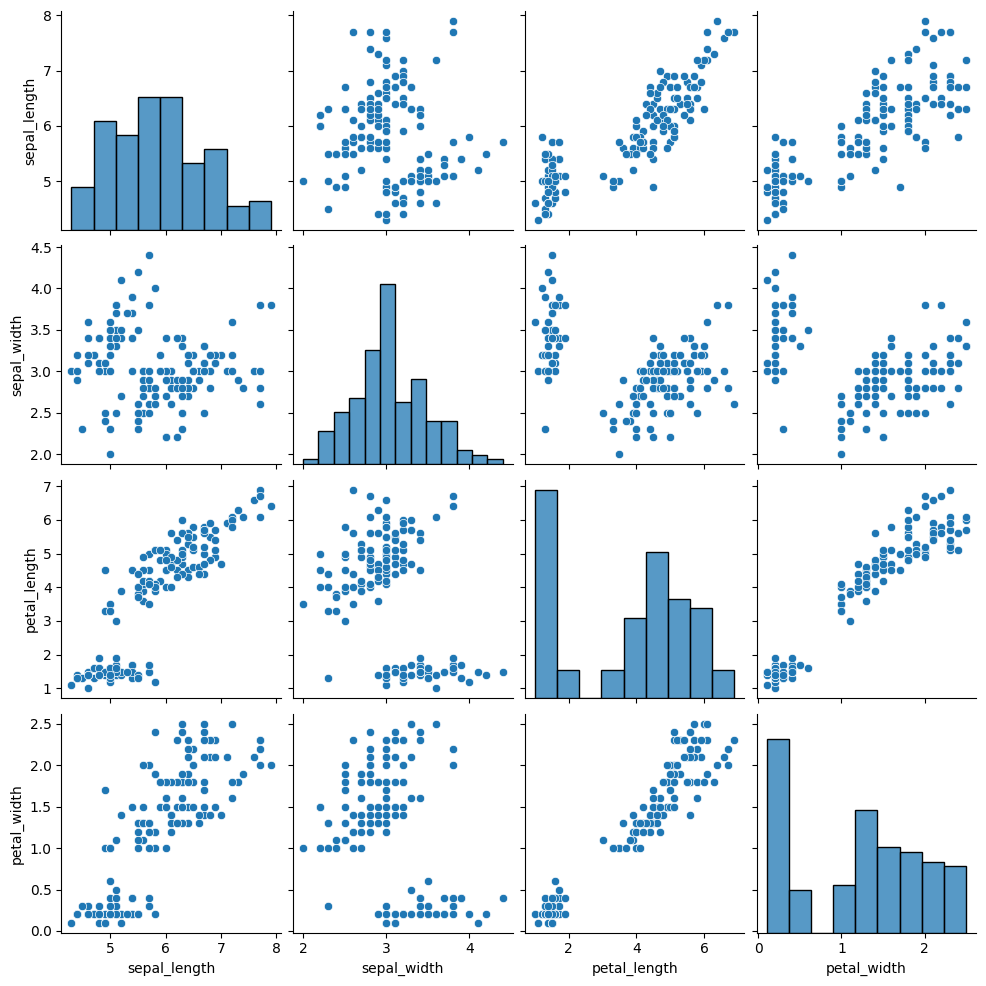

In [8]:
sns.pairplot(df)

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

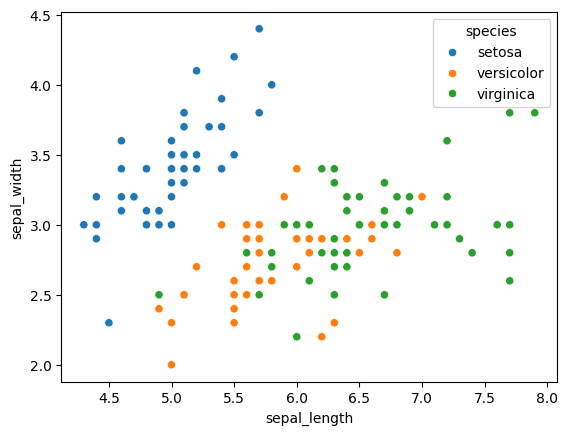

In [10]:
sns.scatterplot(df, x='sepal_length', y='sepal_width', hue='species')

<Axes: xlabel='species', ylabel='count'>

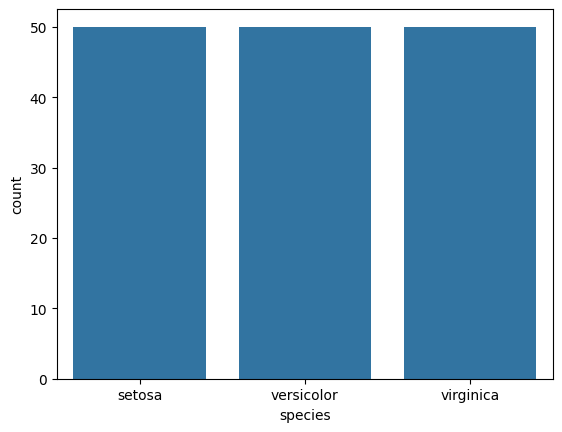

In [14]:
sns.countplot(df, x='species')

Label Encoding

In [17]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

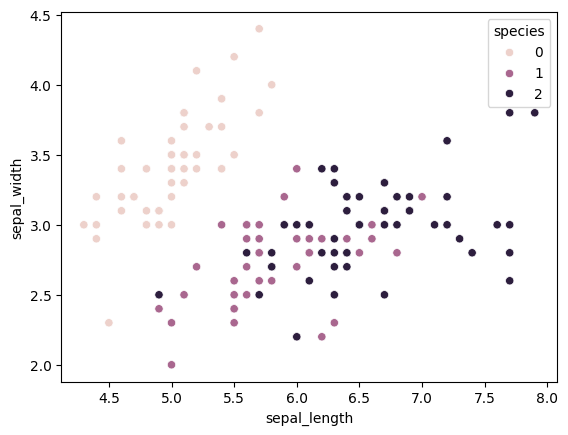

In [21]:
sns.scatterplot(df, x='sepal_length',y='sepal_width', hue='species')

In [22]:
df.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
53,5.5,2.3,4.0,1.3,1


### Logistic Regression: [Polynomial]

In [88]:
X = df.drop(columns=['species'])
y = df[['species']]

In [89]:
ploynomial = PolynomialFeatures(degree=2, include_bias=False)
X_trf = ploynomial.fit_transform(X)

In [90]:
X_trf.shape

(150, 14)

In [91]:
# train test splitting

X_trf_train, X_trf_test, y_trf_train, y_trf_test = train_test_split(X_trf, y, test_size=0.2)

In [92]:
clf1 = LogisticRegression()
clf1.fit(X_trf_train, y_trf_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [93]:
y_pred1 = clf1.predict(X_trf_test)

### Useful matrics `methods` in sklearn:
- Some metrics are as follows:
    - MAE
    - MSE
    - RMSE
    - R2 Score
    - Precision
    - Recall
    - F1 Score
    - Confusion matrix
    - Classification report

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

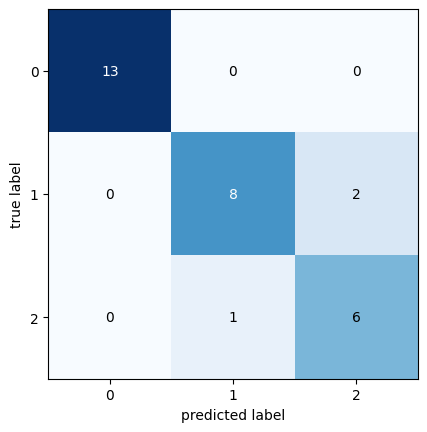

In [94]:
# confusion matrix

plot_confusion_matrix(confusion_matrix(y_trf_test, y_pred1))

In [95]:
precision_score(y_trf_test, y_pred1, average='weighted')

np.float64(0.9046296296296297)

In [96]:
recall_score(y_trf_test, y_pred1, average='weighted')

np.float64(0.9)

In [97]:
print(classification_report(y_trf_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.89      0.80      0.84        10
           2       0.75      0.86      0.80         7

    accuracy                           0.90        30
   macro avg       0.88      0.89      0.88        30
weighted avg       0.90      0.90      0.90        30



In [120]:
clf1.coef_.shape

(3, 14)

In [119]:
plot_decision_regions(X_trf, y, clf1, filler_feature_values={2: 0.5, 3: 1.0}, filler_feature_ranges={2: 0.2, 3: 0.2})

ValueError: y and X must contain the same number of samples. Got y: 100, X: 150